# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

In [3]:
print(cities)

['panaba', 'karaul', 'alofi', 'sur', 'upernavik', 'nanortalik', 'cape town', 'atuona', 'fatehpur', 'emilio carranza', 'arraial do cabo', 'isangel', 'hobart', 'kemi', 'puerto ayora', 'nizhneyansk', 'punta arenas', 'faya', 'taolanaro', 'mandal', 'kwekwe', 'laguna', 'aksarka', 'igrim', 'jamestown', 'wilkes-barre', 'norman wells', 'kizhinga', 'provideniya', 'ushuaia', 'olafsvik', 'mataura', 'xiongzhou', 'ceres', 'vao', 'geraldton', 'gizeh', 'lebu', 'yamada', 'palabuhanratu', 'cockburn town', 'castro', 'saint-philippe', 'avarua', 'kodiak', 'kendari', 'bolshaya sosnova', 'cidreira', 'sitka', 'puerto baquerizo moreno', 'kavaratti', 'baruun-urt', 'busselton', 'kalabagh', 'hermanus', 'yellowknife', 'katsuura', 'baykit', 'benghazi', 'tumannyy', 'trairi', 'cedar city', 'funtua', 'bambous virieux', 'sawtell', 'jhalu', 'clyde river', 'comodoro rivadavia', 'talaya', 'sal rei', 'oistins', 'kuche', 'bredasdorp', 'saldanha', 'albany', 'barentsburg', 'port alfred', 'ayan', 'rikitea', 'kaeo', 'qaanaaq', 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_list=[]
cloudiness_list=[]
humidity_list=[]
max_temp_list=[]
wind_speed_list=[]
lat_list=[]
lng_list=[]
city_count=0

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"

for city in cities:
    city_count = city_count+1
#     print(city)
    try:    

        query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
#         print(query_url)
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
#         pprint(weather_json)
        lat_response = weather_json["coord"]["lat"]
#         print(lat_response)
        lat_list.append (lat_response)
        lng_response = weather_json["coord"]["lon"]
        lng_list.append (lng_response)
        city_list.append (weather_json["name"])
        cloudiness_list.append(weather_json["clouds"]["all"])
        humidity_list.append (weather_json["main"]["humidity"])
        max_temp_list.append (weather_json["main"]['temp_max'])
        wind_speed_list.append (weather_json["wind"]["speed"])  
        
#         print(city_count)
#         print(city_list)
#         print(lat_list)
#         print(lng_list)
        print("Retrieving  data for record " + str(city_count) + " " + city)                                
#         print(f"Getting data for :" {(weather_json["id"])} + city)   
#           (f"Total Months: {str(total_month)}")
                                          
    except:
        print("Error in getting data for city " + city)
        

pprint(weather_json)


Retrieving  data for record 1 panaba
Error in getting data for city karaul
Retrieving  data for record 3 alofi
Retrieving  data for record 4 sur
Retrieving  data for record 5 upernavik
Retrieving  data for record 6 nanortalik
Retrieving  data for record 7 cape town
Retrieving  data for record 8 atuona
Retrieving  data for record 9 fatehpur
Retrieving  data for record 10 emilio carranza
Retrieving  data for record 11 arraial do cabo
Retrieving  data for record 12 isangel
Retrieving  data for record 13 hobart
Retrieving  data for record 14 kemi
Retrieving  data for record 15 puerto ayora
Error in getting data for city nizhneyansk
Retrieving  data for record 17 punta arenas
Retrieving  data for record 18 faya
Error in getting data for city taolanaro
Retrieving  data for record 20 mandal
Retrieving  data for record 21 kwekwe
Retrieving  data for record 22 laguna
Retrieving  data for record 23 aksarka
Retrieving  data for record 24 igrim
Retrieving  data for record 25 jamestown
Retrieving  

Retrieving  data for record 202 ilebo
Retrieving  data for record 203 luderitz
Error in getting data for city monte cristi
Retrieving  data for record 205 georgetown
Retrieving  data for record 206 paamiut
Retrieving  data for record 207 thompson
Error in getting data for city karamken
Retrieving  data for record 209 lianran
Retrieving  data for record 210 ulladulla
Retrieving  data for record 211 airai
Retrieving  data for record 212 pabianice
Retrieving  data for record 213 narsaq
Retrieving  data for record 214 sao filipe
Retrieving  data for record 215 kavieng
Error in getting data for city cagayan de tawi-tawi
Retrieving  data for record 217 mandalgovi
Retrieving  data for record 218 diffa
Retrieving  data for record 219 temir
Retrieving  data for record 220 beni suef
Retrieving  data for record 221 mayo
Retrieving  data for record 222 college
Error in getting data for city riaba
Retrieving  data for record 224 port blair
Retrieving  data for record 225 taoudenni
Retrieving  data 

Retrieving  data for record 400 husavik
Retrieving  data for record 401 the valley
Retrieving  data for record 402 verona
Retrieving  data for record 403 wuwei
Error in getting data for city berbera
Retrieving  data for record 405 aleksandrovskiy zavod
Error in getting data for city lolua
Retrieving  data for record 407 lumberton
Retrieving  data for record 408 ugoofaaru
Error in getting data for city koungou
Error in getting data for city toliary
Retrieving  data for record 411 kailua
Retrieving  data for record 412 asosa
Retrieving  data for record 413 kahului
Retrieving  data for record 414 kangaatsiaq
Retrieving  data for record 415 sechura
Retrieving  data for record 416 puerto madero
Retrieving  data for record 417 severo-kurilsk
Retrieving  data for record 418 hualmay
Retrieving  data for record 419 kodinsk
Retrieving  data for record 420 egvekinot
Error in getting data for city kytlym
Retrieving  data for record 422 revelstoke
Retrieving  data for record 423 taltal
Retrieving  

Retrieving  data for record 599 talcahuano
Retrieving  data for record 600 yumen
Retrieving  data for record 601 kijang
Retrieving  data for record 602 vega de alatorre
Retrieving  data for record 603 karasburg
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -28.01, 'lon': 18.75},
 'dt': 1553832509,
 'id': 3356343,
 'main': {'grnd_level': 915.68,
          'humidity': 49,
          'pressure': 1016.22,
          'sea_level': 1016.22,
          'temp': 56.73,
          'temp_max': 56.73,
          'temp_min': 56.73},
 'name': 'Karasburg',
 'sys': {'country': 'NA',
         'message': 0.0033,
         'sunrise': 1553835175,
         'sunset': 1553877997},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 49.0006, 'speed': 2.93}}


In [7]:
print(len(city_list))
print(len(cloudiness_list))
print(len(humidity_list))
print(len(max_temp_list))
print(len(wind_speed_list))
print(len(lat_list))
print(len(lng_list))
print(city_count)


539
539
539
539
539
539
539
603


In [8]:
city_data = dict()
city_data = {"City": city_list, "Cloudiness": cloudiness_list, "Humidity": humidity_list, "Latitude": lat_list, "Longitude": lng_list, "Max Temp": max_temp_list, "Wind Speed":wind_speed_list}
city_data_df = pd.DataFrame(city_data)

In [9]:
city_data_df.head(10)

,City,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Panaba,8,54,21.28,-88.27,73.74,8.52
1,Alofi,92,98,-19.06,-169.92,82.92,8.19
2,Sur,0,88,22.57,59.53,75.54,1.14
3,Upernavik,56,100,72.79,-56.15,8.67,8.52
4,Nanortalik,64,99,60.14,-45.24,25.50,5.50
5,Cape Town,20,93,-33.93,18.42,66.00,3.36
6,Atuona,92,100,-9.80,-139.03,80.94,14.12
7,Fatehpur,8,67,31.18,71.21,71.76,9.42
8,Emilio Carranza,0,91,19.97,-96.61,65.01,5.06
9,Arraial do Cabo,76,100,-22.97,-42.02,69.42,4.38


In [10]:
# for index, temp in city_data_df["Max Temp"]

#     temp = temp - 273.15
#     temp = temp + 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
city_data_df.to_csv("city_data.csv", encoding="utf-8", index=True)

In [12]:
city_data_df.tail(10)

,City,Cloudiness,Humidity,Latitude,Longitude,Max Temp,Wind Speed
529,Richards Bay,12,85,-28.77,32.06,69.78,5.73
530,Amalapuram,40,58,16.58,82.00,86.00,5.82
531,Graaff-Reinet,0,78,-32.25,24.53,47.46,1.92
532,Bundaberg,90,83,-24.87,152.35,84.00,9.17
533,Samarai,48,100,-10.62,150.67,82.56,11.77
534,Talcahuano,90,82,-36.72,-73.12,57.20,4.70
535,Yumen,8,50,40.29,97.04,39.27,6.51
536,Kijang,40,55,35.24,129.21,62.60,8.05
537,Vega de Alatorre,0,91,20.03,-96.65,65.01,5.06
538,Karasburg,0,49,-28.01,18.75,56.73,2.93


In [13]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 7 columns):
City          539 non-null object
Cloudiness    539 non-null int64
Humidity      539 non-null int64
Latitude      539 non-null float64
Longitude     539 non-null float64
Max Temp      539 non-null float64
Wind Speed    539 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 29.6+ KB


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

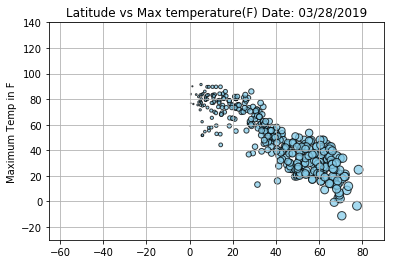

In [15]:
x_axis = city_data_df["Latitude"]
y_axis_Temperature = city_data_df["Max Temp"]
y_axis_Humidity = city_data_df["Humidity"]
y_axis_Cloudiness = city_data_df["Cloudiness"]
y_axis_Wind_Speed = city_data_df["Wind Speed"]

plt.scatter(x_axis, y_axis_Temperature, marker="o", facecolors = "skyblue", edgecolors="black", s=x_axis, alpha=0.75)

plt.xlim(-65,90)
plt.ylim(-30,140)
plt.title("Latitude vs Max temperature(F) Date: 03/28/2019")
plt.grid()
plt.ylabel("Maximum Temp in F")

# plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
#             s=x_axis, alpha=0.75)

plt.savefig("Maxtemp.png")







#### Latitude vs. Humidity Plot

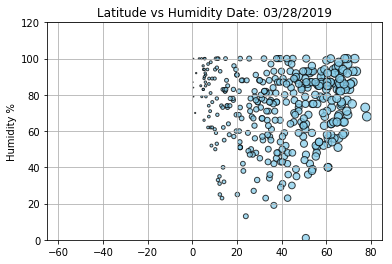

In [16]:
plt.scatter(x_axis, y_axis_Humidity, marker="o", facecolors = "skyblue", edgecolors="black", s=x_axis, alpha=0.75)
plt.xlim(-65,85)
plt.ylim(0,120)
plt.title("Latitude vs Humidity Date: 03/28/2019")
plt.grid()
plt.ylabel("Humidity %")

# plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
#             s=x_axis, alpha=0.75)

plt.savefig("Humidity.png")




#### Latitude vs. Cloudiness Plot

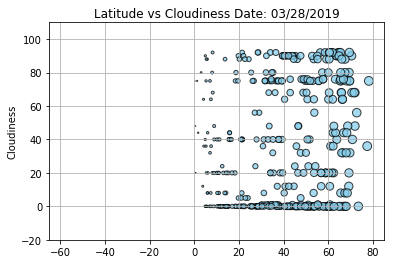

In [17]:
plt.scatter(x_axis, y_axis_Cloudiness, marker="o", facecolors = "skyblue", edgecolors="black", s=x_axis, alpha=0.75)

plt.xlim(-65,85)
plt.ylim(-20,110)
plt.title("Latitude vs Cloudiness Date: 03/28/2019")
plt.grid()
plt.ylabel("Cloudiness")

# plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
#             s=x_axis, alpha=0.75)

plt.savefig("Cloudiness.png")




#### Latitude vs. Wind Speed Plot

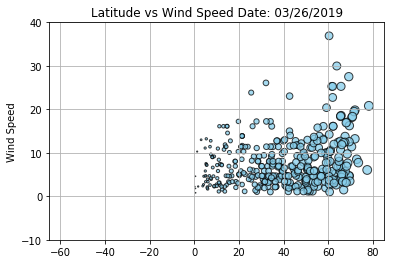

In [18]:
plt.scatter(x_axis, y_axis_Wind_Speed, marker="o", facecolors = "skyblue", edgecolors="black", s=x_axis, alpha=0.75)

plt.xlim(-65,85)
plt.ylim(-10, 40)
plt.title("Latitude vs Wind Speed Date: 03/26/2019")
plt.grid()
plt.ylabel("Wind Speed")

# plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
#             s=x_axis, alpha=0.75)

plt.savefig("Wind Speed.png")


